# Review 

In [2]:
import sys
sys.path.append("..")

In [3]:
import dynamics
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [4]:
%config InlineBackend.figure_format = "retina"
plt.rcParams["axes.spines.right"] = False
plt.rcParams["axes.spines.top"] = False

## Plotting vector fields

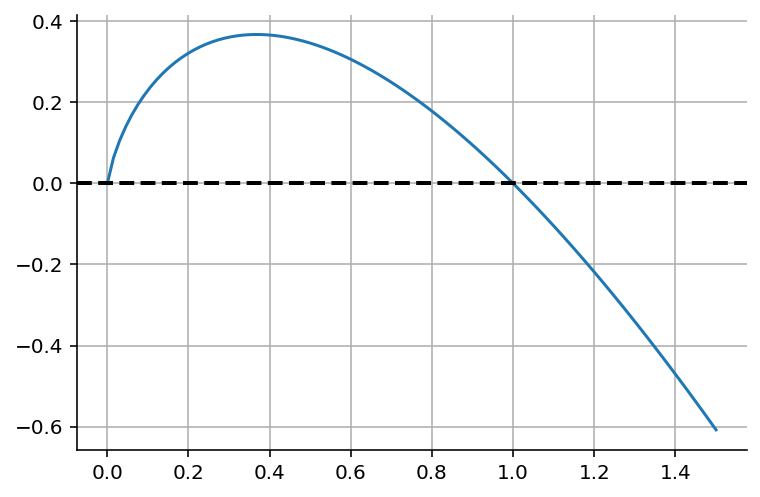

In [5]:
a, b = 1, 1
def f(N, t): return -a * N * np.log(b * N)

domain = np.linspace(1e-6, 1.5, 100)
plt.plot(domain, f(domain, 1))
plt.axhline(y=0,c="black", linestyle="--", linewidth=2)
plt.grid()

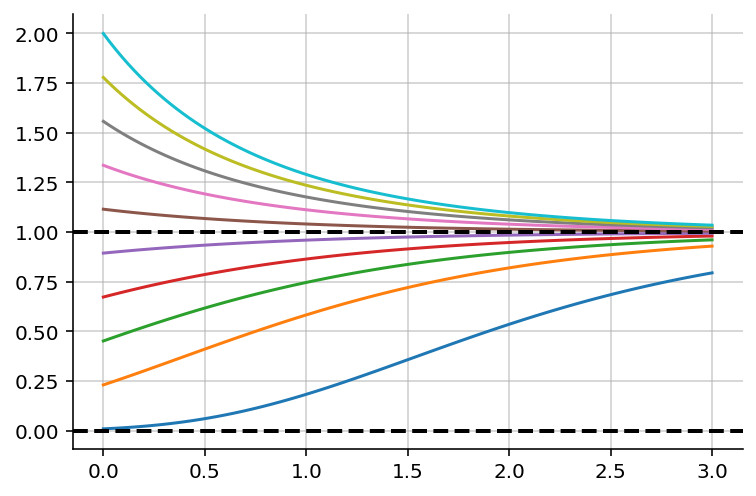

In [6]:
N0_vals = np.linspace(0.01, 2, 10)
t = np.linspace(0, 3, 100)
I = odeint(f, N0_vals, t)

plt.plot(t, I)
plt.axhline(y=0, c="black", linewidth=2, linestyle="--")
plt.axhline(y=1, c="black", linewidth=2, linestyle="--")
plt.grid(alpha=0.6)

## Chapter 3: Bifurcations

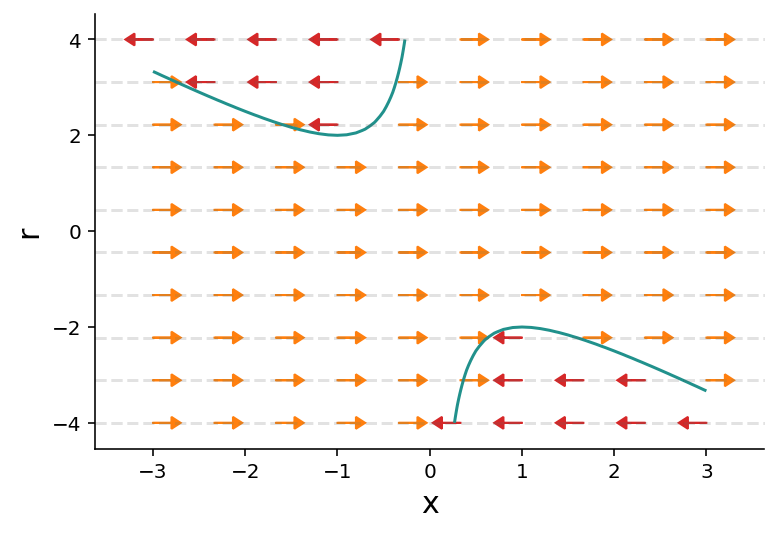

In [36]:
def f(x, r):
    return 1 + r * x + x ** 2

r_vals = np.linspace(-4, 4, 10)
dynamics.plot_bifurcation_diagram(f, r_vals, 10, -3, 3)

## Chapter 4: Flows on the circle

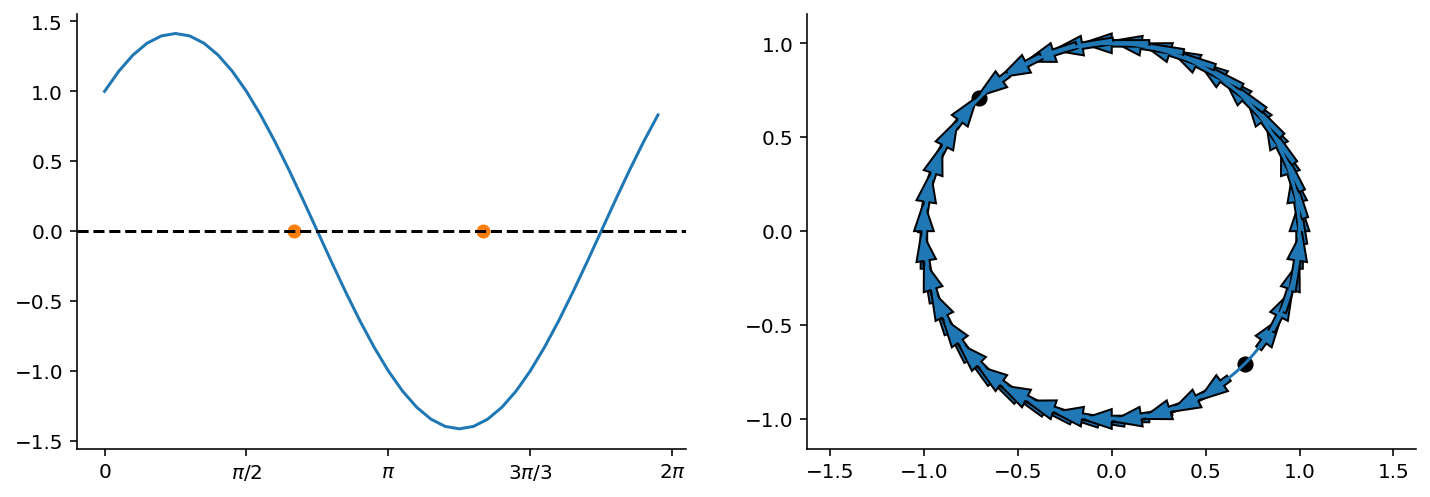

In [6]:
theta_init = np.arange(0, 2 * np.pi, np.pi / (4 * 5))

def f(θ):
    return np.sin(θ) + np.cos(θ)

fig, ax = plt.subplots(1, 2, figsize=(12, 4))

xticks = np.arange(0, 2 * np.pi + np.pi / 2, np.pi / 2)
xticks_labels = [r"$0$", r"$\pi/2$", r"$\pi$", r"$3\pi / 3$", r"$2\pi$"]
ax[0].plot(theta_init, f(theta_init))
ax[0].axhline(y=0, c="black", linestyle="--")
ax[0].scatter([2 * np.pi / 3, 4 * np.pi / 3], [0, 0], color="tab:orange")
ax[0].set_xticks(xticks)
ax[0].set_xticklabels(xticks_labels)

dynamics.plot_circular_dynamics(theta_init, f, ax=ax[1])

## Chapter 6: Phase plane

In [7]:
def f(X):
    x, y = X
    xdot = 1 + y - np.exp(-x)
    ydot = x ** 3 - y
    return xdot, ydot

In [8]:
X = np.mgrid[-3:3:0.1, -3:3:0.1][::-1]

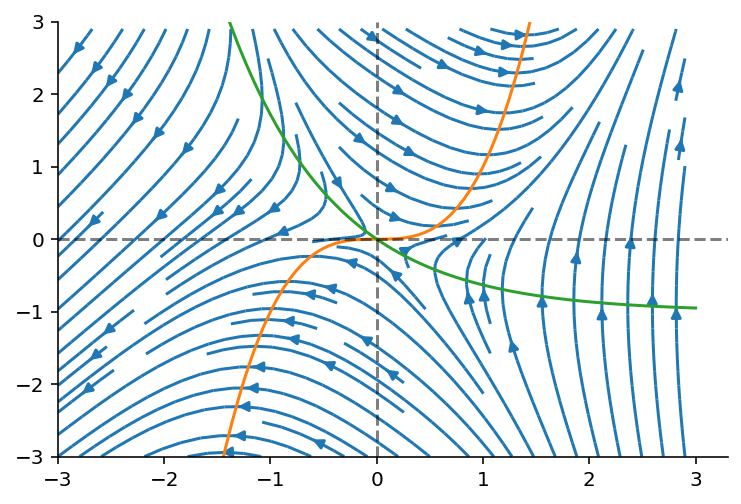

In [9]:
Xdot = np.stack(f(X))
plt.streamplot(*X, *Xdot)

xrange = np.linspace(-3, 3, 100)
plt.plot(xrange, xrange ** 3)
plt.plot(xrange, np.exp(-xrange) - 1)
plt.ylim(-3, 3)
plt.axhline(y=0, c="black", linestyle="--", alpha=0.5)
plt.axvline(x=0, c="black", linestyle="--", alpha=0.5)

## Chapter 7: limit cycles

In [10]:
def f(X):
    x, y = X
    ẋ = x - y - x * (x ** 2 + 5 * y ** 2)
    ẏ = x + y - y * (x ** 2 + y ** 2)
    return ẋ, ẏ

In [11]:
X = np.mgrid[-2:2:0.1, -3:3:0.1][::-1]
Xdot = np.stack(f(X))

In [12]:
rhat = 1.1
xrange = np.linspace(-1.5, 1.5, 500)
ymax_up = np.sqrt(rhat ** 2 - xrange ** 2)
ymax_down = -ymax_up

rhat = 0.5
ymin_up = np.sqrt(rhat ** 2 - xrange ** 2)
ymin_down = -ymin_up

<ipython-input-12-a0d5f28a3433>:3: RuntimeWarning: invalid value encountered in sqrt
  ymax_up = np.sqrt(rhat ** 2 - xrange ** 2)
<ipython-input-12-a0d5f28a3433>:7: RuntimeWarning: invalid value encountered in sqrt
  ymin_up = np.sqrt(rhat ** 2 - xrange ** 2)


(-3.0, 2.9000000000000004, -2.0, 1.9000000000000004)

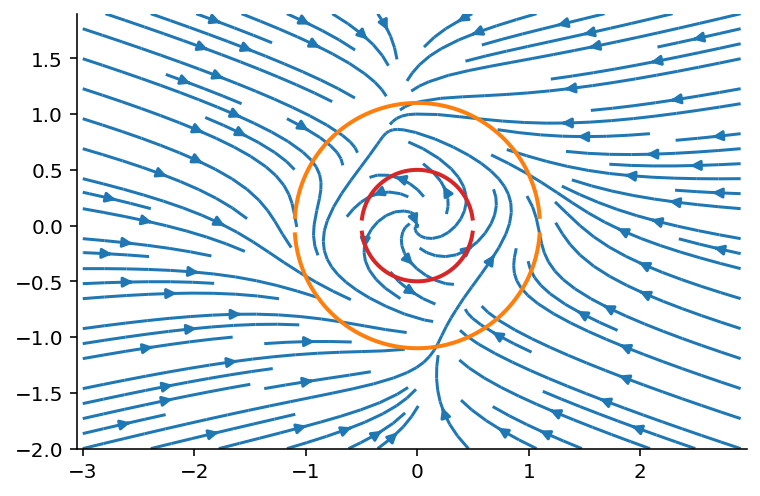

In [13]:
plt.streamplot(*X, *Xdot, density=1)

# Circle of maximum radius
plt.plot(xrange, ymax_up, c="tab:orange", linewidth=2)
plt.plot(xrange, ymax_down, c="tab:orange", linewidth=2)

# Circle of minimum radius

plt.plot(xrange, ymin_up, c="tab:red", linewidth=2)
plt.plot(xrange, ymin_down, c="tab:red", linewidth=2)
plt.axis("equal")

### Exercise 7.3.8

Consider the system $\dot r= r(1-r^2) + \mu r \cos(\theta)$, $\dot \theta = 1$

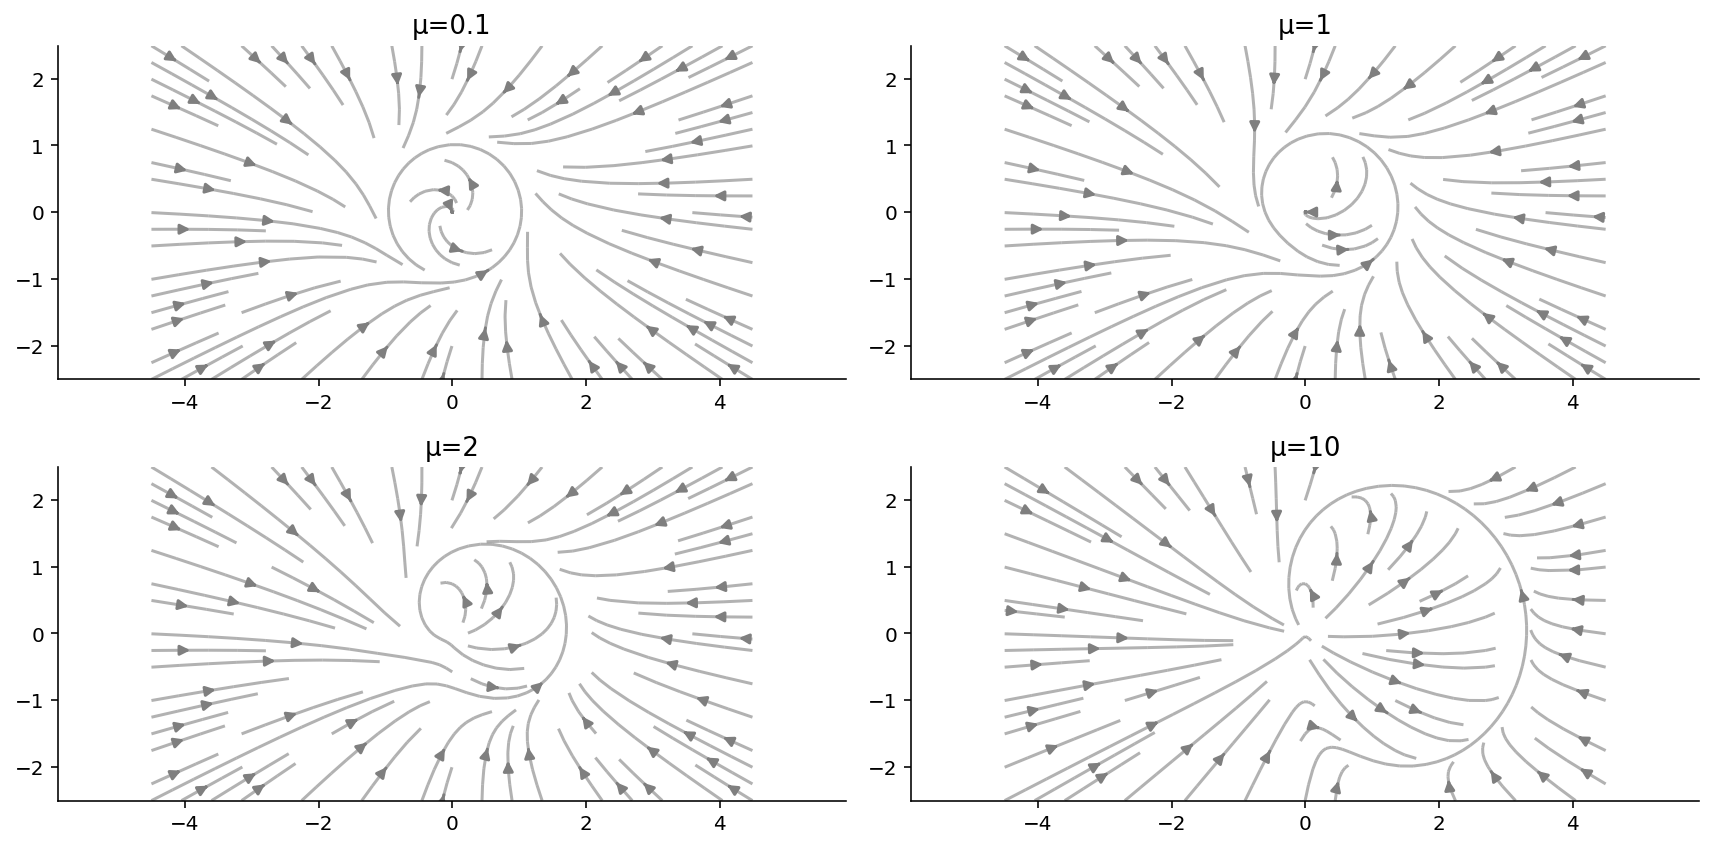

In [58]:
def r_dot(r, θ): return r * (1 - r ** 2) + μ * r * np.cos(θ)
def θ_dot(r, θ): return 1

xmin, xmax = -4.5, 4.5
ymin, ymax = -2.5, 2.5

fig, ax = plt.subplots(2, 2, figsize=(12, 6))
ax = ax.ravel()

μ_vals = [0.1, 1, 2, 10]
for μ, axi in zip(μ_vals, ax):
    dynamics.plot_polar_system(r_dot, θ_dot, xmin, xmax, ymin, ymax,
                               color="tab:gray", alpha=0.6, ax=axi, density=.7)
    axi.set_title(f"μ={μ}", fontsize=13)
    axi.axis("equal");
plt.tight_layout()

### Question 2(d): 2020 exam

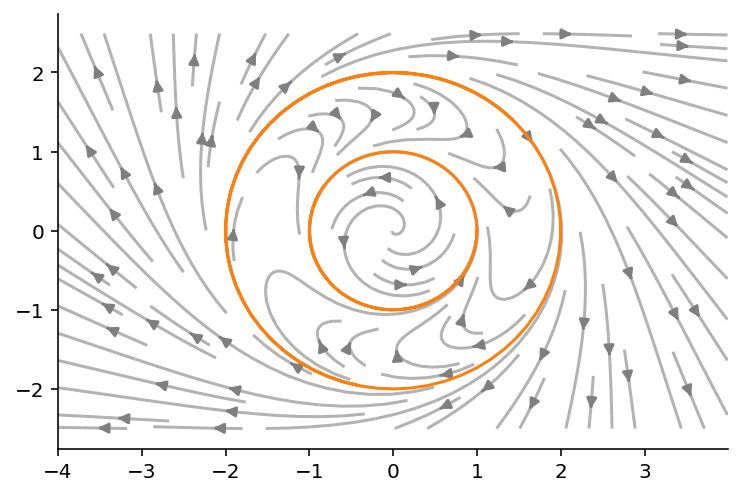

In [15]:
def r_dot(r, θ): return r * (1.0 - r) * (2.0 - r)
def θ_dot(r, θ): return  2 * (1.5 - r)

xmin, xmax = -4, 4
ymin, ymax = -2.5, 2.5

initial_conditions = np.array([[0, 1], [np.sqrt(2), np.sqrt(2)]])

fig, ax = plt.subplots()
dynamics.plot_polar_system(r_dot, θ_dot, xmin, xmax, ymin, ymax, color="tab:gray", alpha=0.6, ax=ax)
dynamics.plot_solution_polar_system(r_dot, θ_dot, initial_conditions, 10, c="tab:orange", ax=ax)